In [ ]:
pip install split-folders

In [ ]:
import splitfolders
import os
path = "/content/drive/MyDrive/new_garbage_classification"
print(os.listdir(path))

['plastic', 'cardboard', 'biological', 'metal', 'paper', 'trash']


In [ ]:
output_path = "/content/drive/MyDrive/Splitted_grabage_dataset"

splitfolders.ratio(path, seed=1337, output=output_path, ratio=(0.8, 0.2), group_prefix=None)

Copying files: 5340 files [02:21, 37.64 files/s]


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
train_Path = '/content/drive/MyDrive/Splitted_grabage_dataset/train'
test_Path = '/content/drive/MyDrive/Splitted_grabage_dataset/val'

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
folders = glob(train_Path + '/*')
folders

['/content/drive/MyDrive/Splitted_grabage_dataset/train/metal',
 '/content/drive/MyDrive/Splitted_grabage_dataset/train/biological',
 '/content/drive/MyDrive/Splitted_grabage_dataset/train/plastic',
 '/content/drive/MyDrive/Splitted_grabage_dataset/train/cardboard',
 '/content/drive/MyDrive/Splitted_grabage_dataset/train/paper',
 '/content/drive/MyDrive/Splitted_grabage_dataset/train/trash']

In [ ]:
garbage_label = ['metal','biological', 'plastic', 'cardboard','paper','trash']

In [ ]:
len(folders)

6

##Resnet-50

In [ ]:
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 3787 images belonging to 6 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 890 images belonging to 6 classes.


In [ ]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-29-04f65d1b5538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
119/119 [==============================] - 2608s 22s/step - loss: 4.4597 - accuracy: 0.4938 - val_loss: 91.3048 - val_accuracy: 0.2000
Epoch 2/10
119/119 [==============================] - 88s 741ms/step - loss: 1.4196 - accuracy: 0.6279 - val_loss: 5.5813 - val_accuracy: 0.2000
Epoch 3/10
119/119 [==============================] - 88s 738ms/step - loss: 1.4385 - accuracy: 0.6765 - val_loss: 4.3425 - val_accuracy: 0.2000
Epoch 4/10
119/119 [==============================] - 88s 738ms/step - loss: 1.9224 - accuracy: 0.6385 - val_loss: 1.8392 - val_accuracy: 0.2449
Epoch 5/10
119/119 [==============================] - 86s 726ms/step - loss: 1.4707 - accuracy: 0.6506 - val_loss: 3.7534 - val_accuracy: 0.2011
Epoch 6/10
119/119 [==============================] - 90s 753ms/step - loss: 0.9830 - accuracy: 0.7161 - val_loss: 2.3940 - val_accuracy: 0.2247
Epoch 7/10
119/119 [==============================] - 88s 735ms/step - loss: 0.8477 - accuracy: 0.7383 - val_loss: 1.6714 - val_a

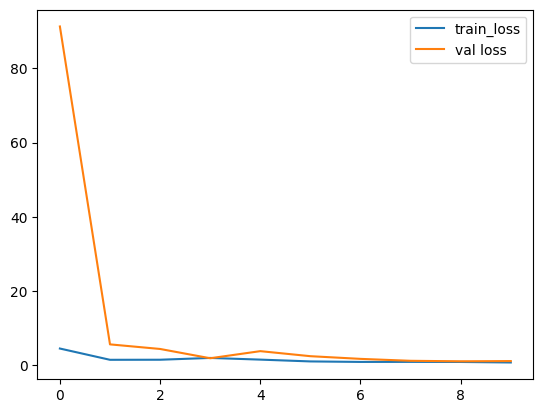

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

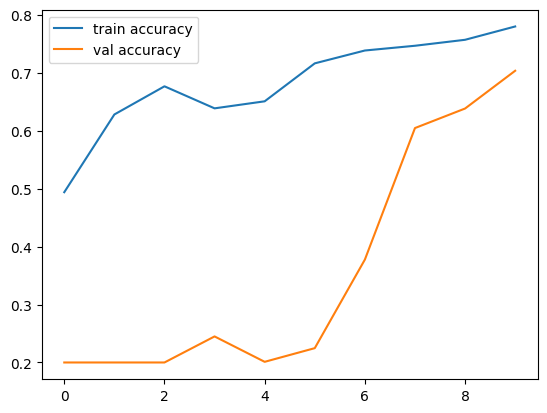

In [ ]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('garbage_clf_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import shutil

# Move the model file to your Google Drive
shutil.move("garbage_clf_resnet50.h5", "/content/drive/My Drive/")

'/content/drive/My Drive/garbage_clf_resnet50.h5'

Prediction On test data

In [ ]:
prediction = model.predict(test_set)

28/28 [==============================] - 16s 535ms/step


In [ ]:
prediction

array([[0.19895673, 0.20499721, 0.14636025, 0.29720524, 0.13194099,
        0.02053955],
       [0.02973852, 0.8485556 , 0.02458428, 0.03509017, 0.05752473,
        0.00450655],
       [0.13809846, 0.12476262, 0.1908673 , 0.19909735, 0.20890631,
        0.13826789],
       ...,
       [0.0512198 , 0.0501191 , 0.163967  , 0.0338035 , 0.51840246,
        0.18248814],
       [0.11991211, 0.08139088, 0.0950739 , 0.6095621 , 0.08083819,
        0.01322284],
       [0.03203521, 0.07668163, 0.13646315, 0.0697503 , 0.49438804,
        0.19068164]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis = 1)
prediction

array([3, 1, 4, 2, 4, 0, 1, 1, 1, 0, 4, 5, 1, 2, 0, 1, 4, 0, 0, 0, 0, 3,
       0, 1, 4, 0, 4, 4, 3, 0, 4, 4, 3, 3, 4, 0, 3, 3, 5, 3, 0, 1, 2, 1,
       2, 0, 1, 1, 4, 0, 1, 0, 0, 1, 0, 1, 3, 0, 0, 2, 1, 0, 1, 2, 2, 0,
       1, 1, 3, 0, 4, 0, 5, 0, 3, 1, 1, 0, 0, 4, 1, 0, 3, 2, 0, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 3, 4, 0, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3,
       0, 4, 0, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 3, 3,
       3, 1, 1, 1, 5, 0, 0, 1, 3, 2, 0, 1, 4, 2, 1, 0, 2, 0, 2, 1, 3, 3,
       2, 0, 3, 0, 3, 0, 3, 1, 2, 4, 2, 4, 1, 3, 0, 2, 0, 0, 0, 1, 2, 4,
       2, 2, 0, 0, 3, 0, 1, 1, 2, 1, 3, 0, 3, 1, 3, 0, 2, 0, 0, 5, 1, 0,
       4, 1, 3, 3, 2, 1, 4, 4, 1, 4, 1, 1, 1, 0, 2, 4, 3, 2, 3, 1, 4, 0,
       3, 0, 0, 1, 3, 1, 0, 1, 4, 2, 3, 4, 1, 3, 4, 2, 3, 2, 1, 0, 0, 1,
       2, 0, 4, 2, 0, 4, 1, 0, 4, 2, 3, 1, 4, 0, 1, 3, 1, 3, 1, 0, 3, 5,
       1, 3, 0, 0, 0, 1, 2, 0, 1, 0, 1, 3, 3, 1, 4, 3, 0, 1, 4, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 3,

##VGG_16

In [ ]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import models, layers
from keras.optimizers import Adam
from sklearn import metrics

In [ ]:
train_folder = '/content/drive/MyDrive/Splitted_grabage_dataset/train'
all_data = []
for folder in os.listdir(train_folder):

    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,plastic,/content/drive/MyDrive/Splitted_grabage_datase...
1,plastic,/content/drive/MyDrive/Splitted_grabage_datase...
2,plastic,/content/drive/MyDrive/Splitted_grabage_datase...
3,plastic,/content/drive/MyDrive/Splitted_grabage_datase...
4,plastic,/content/drive/MyDrive/Splitted_grabage_datase...
...,...,...
3782,trash,/content/drive/MyDrive/Splitted_grabage_datase...
3783,trash,/content/drive/MyDrive/Splitted_grabage_datase...
3784,trash,/content/drive/MyDrive/Splitted_grabage_datase...
3785,trash,/content/drive/MyDrive/Splitted_grabage_datase...


In [ ]:
img_width, img_height = 128, 128
batch_size = 128
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())

In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Splitted_grabage_dataset/train",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Splitted_grabage_dataset/val",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 3787 files belonging to 6 classes.
Found 890 files belonging to 6 classes.


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
base_model = VGG16(weights = "imagenet", include_top = False, input_shape = (128, 128, 3))
base_model.trainable = False ## Immutable base model

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras import regularizers
from keras import models, layers
from keras.optimizers import Adam
from sklearn import metrics

In [ ]:
classes = 6
epochs = 10
learning_rate = 0.0001

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
prediction_layer = layers.Dense(classes, activation='softmax')

In [ ]:
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    prediction_layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 18912582 (72.15 MB)
Trainable params: 4197894 (16.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    prediction_layer
])

In [ ]:
from tensorflow.keras import layers, models, optimizers

In [ ]:
learning_rate = 0.0001
adam = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds,
                    epochs=epochs,
                    verbose=1,
                    validation_data=val_ds,
                    shuffle=True)

Epoch 1/10
30/30 [==============================] - 719s 19s/step - loss: 20.4913 - accuracy: 0.5516 - val_loss: 11.9840 - val_accuracy: 0.8270
Epoch 2/10
30/30 [==============================] - 16s 441ms/step - loss: 12.2521 - accuracy: 0.8120 - val_loss: 10.9887 - val_accuracy: 0.8629
Epoch 3/10
30/30 [==============================] - 16s 446ms/step - loss: 10.8533 - accuracy: 0.8537 - val_loss: 10.6035 - val_accuracy: 0.8820
Epoch 4/10
30/30 [==============================] - 16s 452ms/step - loss: 10.0328 - accuracy: 0.9060 - val_loss: 10.3988 - val_accuracy: 0.8910
Epoch 5/10
30/30 [==============================] - 16s 429ms/step - loss: 9.7119 - accuracy: 0.9195 - val_loss: 10.2578 - val_accuracy: 0.8876
Epoch 6/10
30/30 [==============================] - 17s 449ms/step - loss: 9.4141 - accuracy: 0.9332 - val_loss: 10.0677 - val_accuracy: 0.9000
Epoch 7/10
30/30 [==============================] - 16s 427ms/step - loss: 9.1285 - accuracy: 0.9490 - val_loss: 9.9140 - val_accurac

In [ ]:
import matplotlib.pyplot as plt

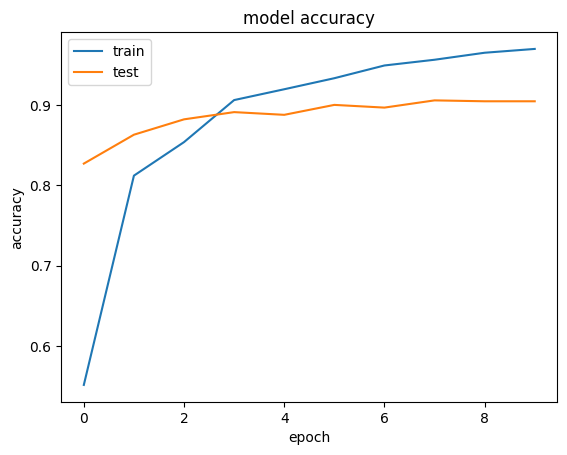

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

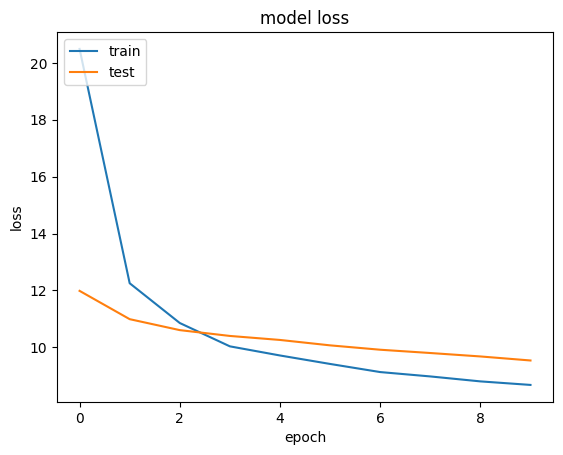

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("Training Accuracy: ", history.history['accuracy'][-1]*100, "%")

Training Accuracy:  96.96329832077026 %


In [ ]:
print("Testing Accuracy: ", history.history['val_accuracy'][-1]*100, "%")

Testing Accuracy:  90.44944047927856 %


In [ ]:
model.save("/content/drive/My Drive/VGG_GC_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
